# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [77]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress 

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 582


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
# Setting units to Celsius based on starter code graph temperatures 
unit = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + unit
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        # Printed out the json response for one city to look for the names to call, then deleted the one city out when cleaning code since it wasn't needed 
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tsiombe
Processing Record 2 of Set 1 | saipan
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | jincheng
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | ilampillai
Processing Record 7 of Set 1 | sur
Processing Record 8 of Set 1 | yerofey pavlovich
Processing Record 9 of Set 1 | egilsstadir
Processing Record 10 of Set 1 | kerikeri
Processing Record 11 of Set 1 | inarajan village
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | namibe
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | sanming
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | uturoa
Processing Record 18 of Set 1 | longyearbyen
Processing Record 19 of Set 1 | san luis de la loma
Processing Record 20 of Set 1 | greenville
Processing Record 21 of Set 1 | iskateley
Processing Record 22 of Set 1 | hawaiian paradise park
Pr

Processing Record 36 of Set 4 | nicoya
Processing Record 37 of Set 4 | sinabang
Processing Record 38 of Set 4 | buala
Processing Record 39 of Set 4 | cabo san lucas
Processing Record 40 of Set 4 | kodiak
Processing Record 41 of Set 4 | kenora
Processing Record 42 of Set 4 | kill devil hills
Processing Record 43 of Set 4 | laayoune plage
City not found. Skipping...
Processing Record 44 of Set 4 | pionerskiy
Processing Record 45 of Set 4 | timbuktu
Processing Record 46 of Set 4 | n'zeto
Processing Record 47 of Set 4 | quellon
Processing Record 48 of Set 4 | lazaro cardenas
Processing Record 49 of Set 4 | hamilton
Processing Record 0 of Set 5 | soc trang
Processing Record 1 of Set 5 | orsova
Processing Record 2 of Set 5 | villanueva
Processing Record 3 of Set 5 | zabaykal'sk
Processing Record 4 of Set 5 | verkhnevilyuysk
Processing Record 5 of Set 5 | ngawi
Processing Record 6 of Set 5 | san patricio
Processing Record 7 of Set 5 | viedma
Processing Record 8 of Set 5 | tabou
Processing Rec

Processing Record 27 of Set 8 | kegen
Processing Record 28 of Set 8 | agva
City not found. Skipping...
Processing Record 29 of Set 8 | la ronge
Processing Record 30 of Set 8 | yanam
Processing Record 31 of Set 8 | antsiranana
Processing Record 32 of Set 8 | moab
Processing Record 33 of Set 8 | mhangura
Processing Record 34 of Set 8 | 'ohonua
City not found. Skipping...
Processing Record 35 of Set 8 | songjianghe
Processing Record 36 of Set 8 | bako
Processing Record 37 of Set 8 | murzuq
Processing Record 38 of Set 8 | murgab
Processing Record 39 of Set 8 | we
City not found. Skipping...
Processing Record 40 of Set 8 | vila franca do campo
Processing Record 41 of Set 8 | ciudad bolivar
Processing Record 42 of Set 8 | nurmes
Processing Record 43 of Set 8 | ulladulla
Processing Record 44 of Set 8 | fuvahmulah
City not found. Skipping...
Processing Record 45 of Set 8 | catalao
Processing Record 46 of Set 8 | birao
Processing Record 47 of Set 8 | quincy
Processing Record 48 of Set 8 | igark

Processing Record 17 of Set 12 | shubarshi
Processing Record 18 of Set 12 | princeville
Processing Record 19 of Set 12 | lethem
Processing Record 20 of Set 12 | sipalay
Processing Record 21 of Set 12 | kismayo
Processing Record 22 of Set 12 | zuyevka
Processing Record 23 of Set 12 | bereket
Processing Record 24 of Set 12 | watsa
Processing Record 25 of Set 12 | yuanping
Processing Record 26 of Set 12 | atar
Processing Record 27 of Set 12 | boyolangu
Processing Record 28 of Set 12 | gilgit
Processing Record 29 of Set 12 | port shepstone
Processing Record 30 of Set 12 | ochakiv
Processing Record 31 of Set 12 | camana
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tsiombe,-25.3000,45.4833,22.52,87,83,1.70,MG,1682270323
1,saipan,15.1355,145.7010,27.39,100,75,6.26,MP,1682270313
2,adamstown,-25.0660,-130.1015,23.62,93,99,7.28,PN,1682270309
3,jincheng,35.5022,112.8328,2.75,99,100,0.91,CN,1682270383
4,tiksi,71.6872,128.8694,-11.74,96,100,1.80,RU,1682270308


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tsiombe,-25.3000,45.4833,22.52,87,83,1.70,MG,1682270323
1,saipan,15.1355,145.7010,27.39,100,75,6.26,MP,1682270313
2,adamstown,-25.0660,-130.1015,23.62,93,99,7.28,PN,1682270309
3,jincheng,35.5022,112.8328,2.75,99,100,0.91,CN,1682270383
4,tiksi,71.6872,128.8694,-11.74,96,100,1.80,RU,1682270308


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

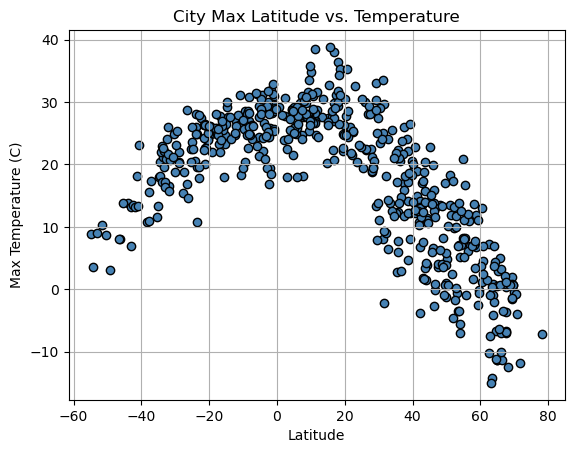

In [10]:
# Build scatter plot for latitude vs. temperature
# Color matched my plots to starter code plots 
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

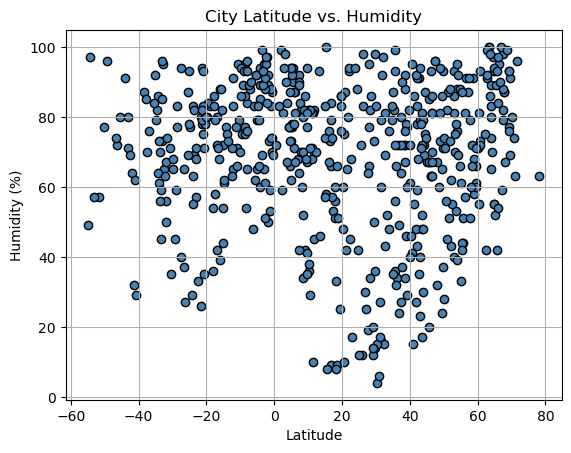

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

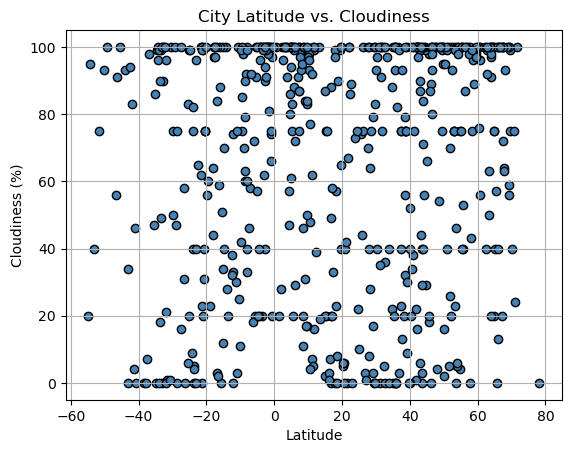

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

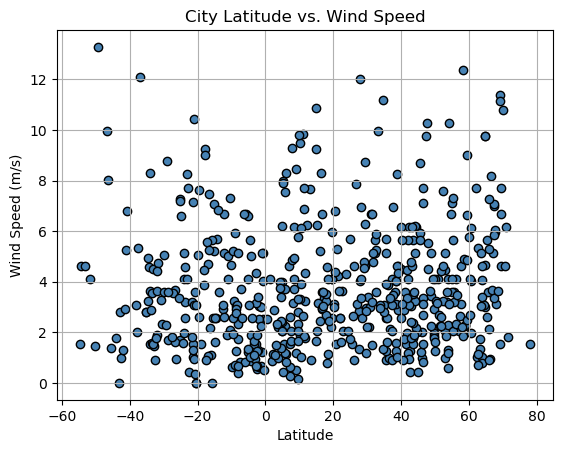

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [68]:
# Define a function to create Linear Regression plots
def linreg(hemi_df):
    # Using linregress to get the linear regression 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
    
    # Getting the linear regression values/y-values to plot on top of the scatter plot
    reg_val = x_val * slope + intercept
    
    # Creating the line/model formula to evenutally print on the plot
    mod_form = "y=" + str(round(slope,2)) + "x +" + str(round(intercept, 2))
    
    # Creating scatter plot and then the line plot 
    plt.scatter(x_val, y_val)
    plt.plot(x_val, reg_val, "r")
    
    # All the x-labels will be latitude by the y-labels change based on the code prompt, so setting it to a variable 
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    
    # Annotating the formula on the graph requires an xy value, see (a, b). Printed the graphs out and then set a and b depending on each individual plot
    plt.annotate(mod_form, (a, b), fontsize=15, color="r")
    print(f"The r-value is: {rvalue}")
    plt.show()

In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,saipan,15.1355,145.7010,27.39,100,75,6.26,MP,1682270313
3,jincheng,35.5022,112.8328,2.75,99,100,0.91,CN,1682270383
4,tiksi,71.6872,128.8694,-11.74,96,100,1.80,RU,1682270308
5,ilampillai,11.6000,78.0000,24.80,82,99,4.33,IN,1682270384
6,sur,22.5667,59.5289,25.15,68,89,3.64,OM,1682269964


In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tsiombe,-25.3000,45.4833,22.52,87,83,1.70,MG,1682270323
2,adamstown,-25.0660,-130.1015,23.62,93,99,7.28,PN,1682270309
9,kerikeri,-35.2268,173.9474,13.28,92,86,2.80,NZ,1682270318
11,ushuaia,-54.8000,-68.3000,8.81,49,20,1.54,AR,1682270223
12,namibe,-15.1961,12.1522,24.70,72,34,7.07,AO,1682269868


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8579747050139844


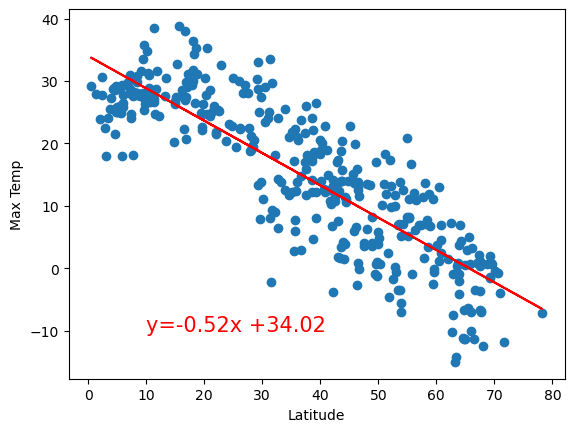

In [69]:
# Linear regression on Northern Hemisphere
x_val = northern_hemi_df["Lat"]
y_val = northern_hemi_df["Max Temp"]
ylabel = "Max Temp"
a = 10
b = -10
linreg(northern_hemi_df)

The r-value is: 0.7644943384214512


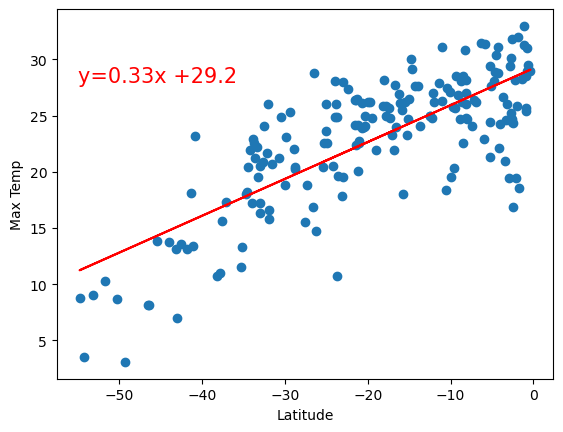

In [70]:
# Linear regression on Southern Hemisphere
x_val = southern_hemi_df["Lat"]
y_val = southern_hemi_df["Max Temp"]
ylabel = "Max Temp"
a = -55
b = 28
linreg(southern_hemi_df)

**Discussion about the linear relationship:** For both the Northern and Southern Hemisphere there is a strong linear correlation between the Maximum Temperature (Celsius) and the Latitude. Knowing that the equator has a latitude of 0 degrees, the strong linear correlation (r-values greater than or equal to 0.7) shows that cities with latitudes closer to zero have warmer maximum temperatures. 

Looking at the Northern Hemisphere plot, the red line trends downward from left to right, indicating a negative correlation. Visually, it can also be said that the red line models the scatter plot data relatively well. These observations are backed up with the r-value of -0.858. The negative r-value means a negative correlation and the absolute value of 0.86 indicates a strong correlation. Therefore, the farther away a city is to the equator, or the greater it's latitude, the colder the maximum temperature of the city. 

Looking at the Southern Hemisphere plot, the red line also models the scatter plot well but trends upwards from left to right. The r-value of 0.765 confirms what is seen visually by the red line, a strong positive correlation between latitude and maximum temperature. Therefore, the closer the city is to the equator, or the closer its latitude is to zero, the warmer the maximum temperature of the city. 

It makes sense that the Northern and Southern Hemisphere both have strong linear relationships because temperature is being compared to latitude in both instances. Additionally, it makes sense that they have opposite correlations in regard to positive and negative because of their opposite positionings on Earth. Based on the above, linear regression is a relatively good model for depicting maximum temperatures based on latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.11008503592047802


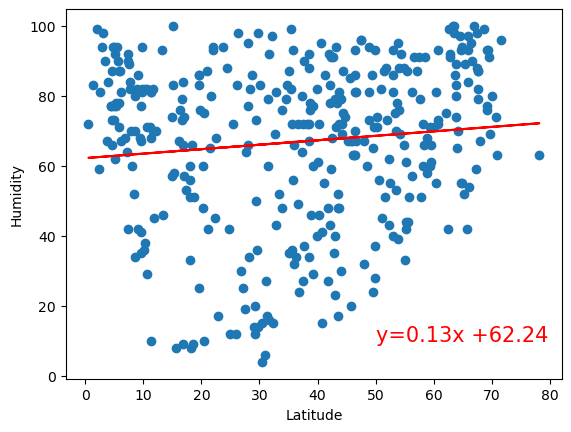

In [71]:
# Northern Hemisphere
x_val = northern_hemi_df["Lat"]
y_val = northern_hemi_df["Humidity"]
ylabel = "Humidity"
a = 50
b = 10
linreg(northern_hemi_df)

The r-value is: 0.23027209396719756


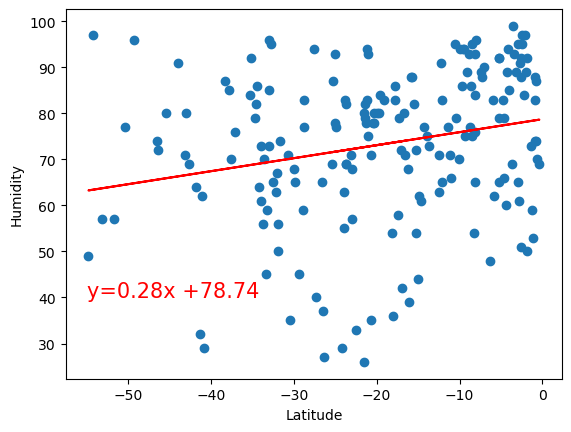

In [72]:
# Southern Hemisphere
x_val = southern_hemi_df["Lat"]
y_val = southern_hemi_df["Humidity"]
ylabel = "Humidity"
a = -55
b = 40
linreg(southern_hemi_df)

**Discussion about the linear relationship:** For both the Northern and Southern Hemispheres, linear regression is not a good model for depicting the correlation between Humidity and Latitude. The Northern Hemisphere r-value of 0.110 and the Southern Hemisphere r-value of 0.230 indicate weak positive correlations. In both instances, the r-values are less than 0.3 which means it is not a good measure. Knowing the latitude cannot correctly help predict the humidity with a linear model. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.08475990957897517


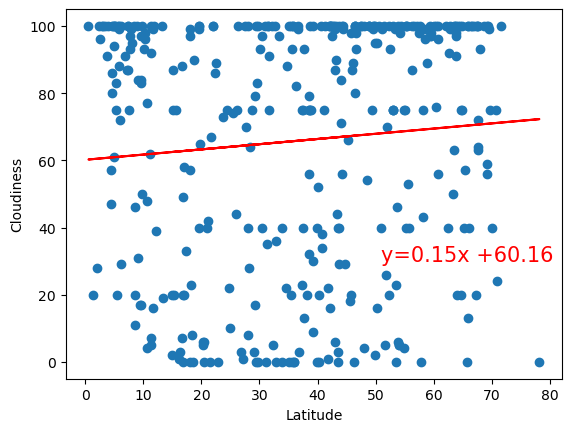

In [73]:
# Northern Hemisphere
x_val = northern_hemi_df["Lat"]
y_val = northern_hemi_df["Cloudiness"]
ylabel = "Cloudiness"
a = 51
b = 30
linreg(northern_hemi_df)

The r-value is: 0.1862359309120294


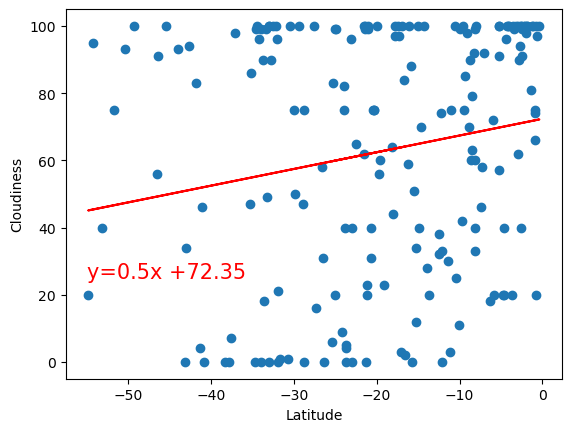

In [74]:
# Southern Hemisphere
x_val = southern_hemi_df["Lat"]
y_val = southern_hemi_df["Cloudiness"]
ylabel = "Cloudiness"
a = -55
b = 25
linreg(southern_hemi_df)

**Discussion about the linear relationship:** Much like humidity, a linear regression model is not a good fit for the correlation between Cloudiness and Latitude. The Northern Hemisphere (r-value = 0.0848) and Southern Hemisphere (r-value = 0.186) both have positive r-values under 0.3, indicating a weak linear correlation. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0997785832743128


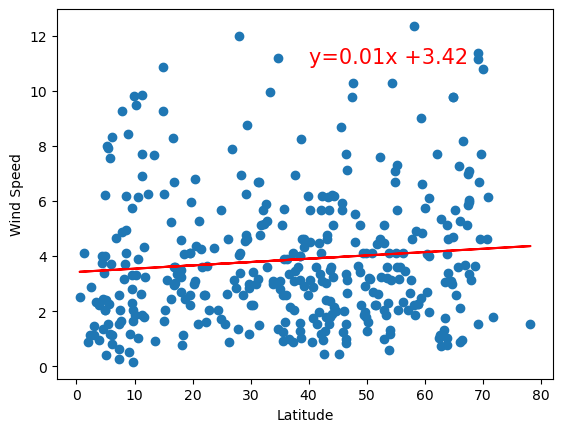

In [75]:
# Northern Hemisphere
x_val = northern_hemi_df["Lat"]
y_val = northern_hemi_df["Wind Speed"]
ylabel = "Wind Speed"
a = 40
b = 11
linreg(northern_hemi_df)

The r-value is: -0.20777525176238026


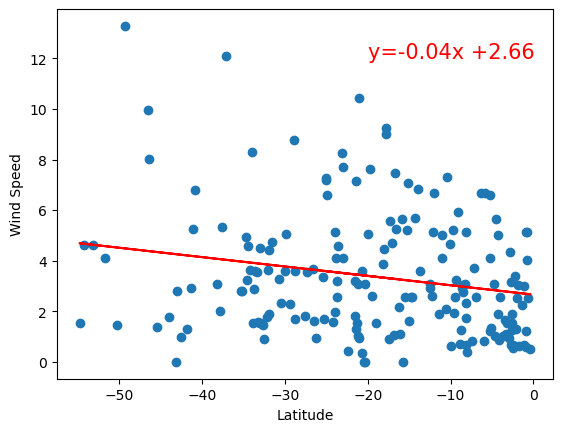

In [76]:
# Southern Hemisphere
x_val = southern_hemi_df["Lat"]
y_val = southern_hemi_df["Wind Speed"]
ylabel = "Wind Speed"
a = -20
b = 12
linreg(southern_hemi_df)

**Discussion about the linear relationship:** Like humidity and cloudiness, the correlation between latitude and windspeed cannot be accurately modeled using a linear regression. In this case, the Northern Hemisphere has a weak positive correlation of 0.100 and the Southern Hemisphere has a weak negative correlation of -0.208. In both cases, the important part is the r-value less than 0.3. The correlation coefficient is so weak that the lines are almost horizontally straight. 